# Lista de Exercícios \#3
## Breno Vieira Arosa

## Questão 1

In [1]:
import numpy as np

#from sklearn.datasets import make_blobs
from functools import partial

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:
X = np.array([0, 4, 6, 9])
print(f"X = {X}")

X = [0 4 6 9]


## 1.a)

In [4]:
def calculate_D(X, tresh):
    X1 = X[X <= tresh]
    X2 = X[X > tresh]
    
    y1 = X1.mean()
    y2 = X2.mean()
    
    d1 = (X1 - y1)**2
    d2 = (X2 - y2)**2
    
    D = np.hstack((d1, d2))
    
    return D.mean()

In [5]:
# vetoriza o calculo das distancias e passa o vetor X como parametro para todos argumentos de treshold
vectorized_calc_D = np.vectorize(partial(calculate_D, X))

T = np.arange(-1, 10.01, .01)
D = vectorized_calc_D(T)

/home/arosa/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/home/arosa/.virtualenvs/ml/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/arosa/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  


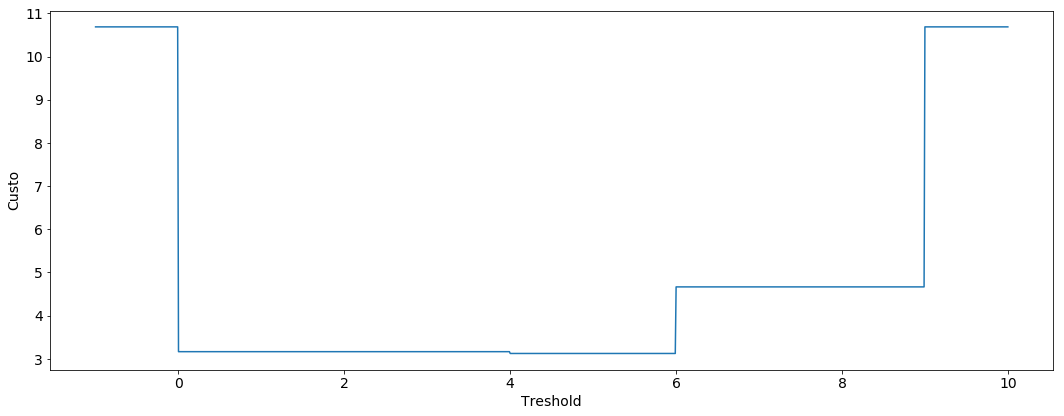

In [6]:
plt.figure(figsize=(15, 6))
   
plt.plot(T, D)

plt.xlabel("Treshold")
plt.ylabel("Custo")

plt.tight_layout()
plt.show()

## 1.b)

In [7]:
y1 = 3.
y2 = 3.4
T = 1

In [8]:
d = np.zeros((2, 4))
d[0, :] = (X - y1)**2
d[1, :] = (X - y2)**2

Z = np.exp(-d / T).sum(axis=0)

py_given_x = np.exp(-d / T) / Z

print(f"p(y|x) =\n{py_given_x}")

p(y|x) =
[[0.92824246 0.34524654 0.09621554 0.00956532]
 [0.07175754 0.65475346 0.90378446 0.99043468]]


## 1.c)

Como os elementos de x são equiprováveis temos:
\begin{equation}
D = \sum_x{p(x) \sum_y{p(y \mid x) d(x, y)}} \approx \frac{1}{N} \sum_y{p(y \mid x) d(x, y)}
\end{equation}

In [9]:
D = (py_given_x * d).sum() / 4
print(f"D = {D}")

D = 12.036140746369405


## 1.d)

\begin{equation}
p(y_i) = \sum_x{p(x) p(y_i \mid x)}
\end{equation}

\begin{equation}
y_i = \frac{\sum_x{x p(x) p(y_i \mid x)}}{p(y_i)}
\end{equation}

Com elementos de x equiprováveis obtemos: 
\begin{equation}
p(y_i) = \sum_x{p(y_i \mid x)}
\end{equation}

\begin{equation}
y_i = \frac{\sum_x{x p(y_i \mid x)}}{p(y_i)}
\end{equation}


In [29]:
py = py_given_x.sum(axis=1)
Y = (py_given_x * X).sum(axis=1) / py
print("Valores atualizados de centroides:")
print(f"y1 = {Y[0]}\ny2 = {Y[1]}")

Valores atualizados de centroides:
y1 = 1.4822097827718683
y2 = 6.469812534006276


## 1.e)

In [41]:
y1 = 3.
y2 = 3.4
T = 0.1

print("Condições iniciais:")
print(f"T = {T}\ny1 = {y1}\ny2 = {y2}")
print("\n")

d = np.zeros((2, 4))
d[0, :] = (X - y1)**2
d[1, :] = (X - y2)**2

Z = np.exp(-d / T).sum(axis=0)

py_given_x = np.exp(-d / T) / Z

print(f"p(y|x) =\n{py_given_x}")
print("\n")

D = (py_given_x * d).sum() / 4
print(f"D = {D}")
print("\n")

py = py_given_x.sum(axis=1)
Y = (py_given_x * X).sum(axis=1) / py
print("Valores atualizados de centroides:")
print(f"y1 = {Y[0]}\ny2 = {Y[1]}")

Condições iniciais:
T = 0.1
y1 = 3.0
y2 = 3.4


p(y|x) =
[[1.00000000e+00 1.65880108e-03 1.86983638e-10 7.05888391e-21]
 [7.62186519e-12 9.98341199e-01 1.00000000e+00 1.00000000e+00]]


D = 11.870265408282416


Valores atualizados de centroides:
y1 = 0.006624217182793266
y2 = 6.334624225733912


## 1.f)

In [43]:
y1 = 3.
y2 = 3.4
T = 50

print("Condições iniciais:")
print(f"T = {T}\ny1 = {y1}\ny2 = {y2}")
print("\n")

d = np.zeros((2, 4))
d[0, :] = (X - y1)**2
d[1, :] = (X - y2)**2

Z = np.exp(-d / T).sum(axis=0)

py_given_x = np.exp(-d / T) / Z

print(f"p(y|x) =\n{py_given_x}")
print("\n")

D = (py_given_x * d).sum() / 4
print(f"D = {D}")
print("\n")

py = py_given_x.sum(axis=1)
Y = (py_given_x * X).sum(axis=1) / py
print("Valores atualizados de centroides:")
print(f"y1 = {Y[0]}\ny2 = {Y[1]}")

Condições iniciais:
T = 50
y1 = 3.0
y2 = 3.4


p(y|x) =
[[0.5127972  0.49680004 0.48880187 0.47681664]
 [0.4872028  0.50319996 0.51119813 0.52318336]]


D = 13.088134141762028


Valores atualizados de centroides:
y1 = 4.663470863661966
y2 = 4.8344108274785


## 1.g)